In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import linspace, polyval, polyfit, sqrt, stats, randn


In [26]:
# constants 
path = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\tapResultParticipants.csv"
pathH = "C:\\Users\\huber\\OneDrive\\Dokumenty\\thesis-hubert\\unity\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 46
players = [2, 7, 11, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62] #26, 58
males = [0, 4, 5 , 6, 7, 12, 14, 15]
females = [1, 2, 3, 8, 9, 10, 11, 13]
gender = [0, 1, 1, 1, 0, 0, 0,  0,  1, 1, 1, 1, 0, 1, 0, 0]
armLength = np.array([28, 23.5, 27, 27, 28, 27, 26, 28,  23, 26, 24, 26, 27, 24, 27, 29])
height = np.array([1.7, 1.73, 1.65, 1.72, 1.77, 1.82, 181, 1.79, 1.6, 1.7, 1.7, 1.65, 1.8, 1.78, 184, 1.85 ])
idxLength = 28
idxGain = 29
blue = 'royalblue'
red = 'crimson'
col1 = 'darkmagenta'
col2 = 'goldenrod'
col3 = 'mediumturquoise'
col4 ='forestgreen'
col5 = 'navy'
plt.rcParams['figure.figsize'] = [20, 5]
cols3 = [col3,blue, col5]

playersBaseline = [4, 9, 13, 16, 19, 24, 28, 31, 36, 39, 43, 48, 51, 56, 60, 63]
playersOptimal  = [3, 8, 12, 15, 20, 23, 27, 32, 35, 40, 44, 47, 52, 55, 59, 64]

#GRAPHS#
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [22]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    return (list1, list2)

def sortBasedOn1(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    return (list1, list2)

# get avg effort and distance per body parts
def EffortPerBodyPartPerPlayer(p, results, batchSize):
    effortBodyParts = [ 0 for i in range(7)]
    distBodyParts = [ 0 for i in range(7)]
    tmp = results[p]
    ids = []
    time = []
    counter = 0
    
    for words in tmp:            
        for i in range (7):
            effortBodyParts[i] += float(words[21+i])
            distBodyParts[i] += float(words[14+i]) 
        time.append(float(words[10]))
        ids.append(float(words[11]))
        counter = counter + 1

    for i in range(7):
        effortBodyParts[i] /= counter
    return (effortBodyParts, distBodyParts, time, ids)

def getResults(results, players):
    efforBodyParts = []
    distBodyParts = []
    time = []
    ids = []
    for p in players:
        tmp = results[p]
        effort, dist, t, i= EffortPerBodyPartPerPlayer(p, results, 10)
        efforBodyParts.append(effort)
        distBodyParts.append(dist)
        time.append(t)
        ids.append(i)
    return ( efforBodyParts, distBodyParts, time, ids)

In [23]:
results = readFromFile(pathH)
efforBodyParts, distBodyParts, times, ids = getResults(results, players)

In [5]:
# get best length for player p - as it was used in the experiment 
p = 46

lengths = getResultPerPlayer(p, results, idxLength, True)
gain = getResultPerPlayer(p, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
    lengths[i] = lengths[i-1]
gain, lengths = getCombinedPlot(gain, lengths)

 # get avg length for the top 3 values of gain
avg = sum(lengths[-3:]) / 3
print(avg)

4.90286466667


In [6]:
def getResultsPerPlayerType(results, players):
    l = []
    avgGain = []
    avgMvmTime = []
    effortAvg = []
    distAvg = []
    for p in range(len(players)):
        lengths = getResultPerPlayer(players[p], results, idxLength, True)
        gain = getResultPerPlayer(players[p], results, idxGain, True)
        mvmTime = getResultPerPlayer(players[p], results, 10, True)

        for i in range(len(lengths)-1, 1, -1):   
                lengths[i] = lengths[i-1]

        gain, lengths = getCombinedPlot(gain, lengths) #sort lengths based on gain 
        gain = getResultPerPlayer(players[p], results, idxGain, True)
        gain, mvmTime = getCombinedPlot(gain, mvmTime) #sort mvmTime based on gain 
        
        # get avg length for the top 3 values of gain
        avg = sum(lengths[-3:]) / 3
        effortAvg.append(efforBodyParts[p])
        distAvg.append(distBodyParts[p])
        avgGain.append(sum(gain) / len(gain))
        avgMvmTime.append(sum(mvmTime[-3:]) / 3)

        l.append(avg)
    return (np.array(l), np.array(avgGain), np.array(avgMvmTime), np.array(effortAvg), np.array(distAvg))

In [7]:
# get results per gender

l, avgGain, avgMvmTime, effortAvg, distAvg = getResultsPerPlayerType(results, players)

multiplierF = list(l[females])
multiplierM = list(l[males])

avgGainF = list(avgGain[females])
avgGainM = list(avgGain[males])

avgMvmTimeF = list(avgMvmTime[females])
avgMvmTimeM = list(avgMvmTime[males])

effortF = list(effortAvg[females])
effortM = list(effortAvg[males])

distF = list(distAvg[females])
distM = list(distAvg[males])

armLengthF = list(np.array(armLength[females]))
armLengthM = list(armLength[males])

armLengthVr = np.array([l[i] * armLength[i] for i in range(len(l))])
armLengthVrM = list(armLengthVr[males])
armLengthVrF = list(armLengthVr[females])

heightF = list(height[females])
heightM = list(height[males])

In [8]:
      
print("Avg best length:", sum(l) / len(l) )
print("Avg male best length:", sum(multiplierM) / len(multiplierM)  )
print("Avg female best length:", sum(multiplierF) / len(multiplierF) )

print(multiplierF)
print(multiplierM)

Avg best length: 4.54321972917
Avg male best length: 5.21538245833
Avg female best length: 3.871057
[3.899167666666667, 2.4882649999999997, 3.390385666666667, 6.2046833333333344, 3.0021586666666664, 4.2141090000000005, 4.902864666666666, 2.8668219999999995]
[4.938574, 5.271202333333334, 5.0918746666666665, 7.1863489999999999, 4.1369103333333337, 5.4459056666666674, 6.9536310000000006, 2.698612666666667]


In [9]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def findCorelation(data1, data2, label=""):
    print(label)
    covariance = np.cov(data1, data2)
    #print(covariance)

    # calculate spearman's correlation
    coef, p = spearmanr(data1, data2) 
    print('Spearmans correlation p-value: %.7f' % p)
       
    # calculate kendall's correlation
    coef, p = kendalltau(data1, data2)
   # print('Kendall correlation coefficient: %.3f' % coef)
    print('Kendall correlation p-value: %.7f' % p)
    print(" ")


effortF = np.array(effortF)
effortM = np.array(effortM)


# findCorelation(armLengthVrF, avgMvmTimeF, "ArmLengthVR/MvmTime Female: ")  #yes kendal: top 3 mvm time, 0.08 avg all mvm time  
# findCorelation(armLengthVrM, avgMvmTimeM, "ArmLengthVR/MvmTime Male: ")  #NOP

# findCorelation(multiplierF, avgMvmTimeF, "ArmLengthMultiplier/MvmTime Female: ")  # fes for kendall   
# findCorelation(multiplierM, avgMvmTimeM, "ArmLengthMultiplier/MvmTime Male: ") # nop - worse then armLenghtVr

# findCorelation(avgGain, armLengthVr, "ArmLengthVR/Gain: ") # nop 
# findCorelation(avgGainF, multiplierF, "multiplier /Gain Female: ") # 0.08  
# findCorelation(avgGainM, multiplierM, "multiplier/Gain Male: ") # nop 

# findCorelation(l, avgMvmTime, "ArmLengthMultiplier/MvmTime : ") # nop 

# findCorelation(armLengthVrF, heightF, "ArmLengthVR/Height female: ") # nop 
# findCorelation(armLengthVrM, heightM, "ArmLengthVR/Height Male: ") #nop

# findCorelation(multiplierF, heightF, "length multipler/Height female: ")  #nop
# findCorelation(multiplierM, heightM, "length multipler/Height Male: ") #nop
# findCorelation(l, height, "length multipler/Height : ") 

# findCorelation(armLength, height, "arm length/Height : ") # nop
# findCorelation(armLengthF, heightF, "arm length/Height F : ") #nop
# findCorelation(armLengthM, heightM, "arm length/Height M: ") #nop

# findCorelation(armLength, armLengthVr, "armLength/ArmLengthVR : ") #nop
# findCorelation(armLengthVr, height, "armLengthVR/height : ") #nop

# body, leftUpperArm, RightUpperArm, RightFoot, LeftFoot, LeftHand, RightHand
findCorelation(effortM[:,0], multiplierM, "multiplier/Effor body Male: ") # nop 
findCorelation(effortM[:,1], multiplierM, "multiplier/Effor leftUpperArm Male: ") # nop 
findCorelation(effortM[:,2], multiplierM, "multiplier/Effor RightUpperArm Male: ") # nop 
findCorelation(effortM[:,3], multiplierM, "multiplier/Effor RightFoot Male: ") # nop 
findCorelation(effortM[:,4], multiplierM, "multiplier/Effor LeftFoot Male: ") # nop 
findCorelation(effortM[:,5], multiplierM, "multiplier/Effor LeftHand Male: ") # yes 
findCorelation(effortM[:,6], multiplierM, "multiplier/Effor RightHand Male: ") # yes Spermans 


findCorelation(effortF[:,0], multiplierF, "multiplier/Effor body Female: ") # yes 
findCorelation(effortF[:,1], multiplierF, "multiplier/Effor leftUpperArm Female: ") # yes 
findCorelation(effortF[:,2], multiplierF, "multiplier/Effor RightUpperArm Female: ") # yes 
findCorelation(effortF[:,3], multiplierF, "multiplier/Effor RightFoot Female: ") # yes 
findCorelation(effortF[:,4], multiplierF, "multiplier/Effor LeftFoot Female: ") # yes 
findCorelation(effortF[:,5], multiplierF, "multiplier/Effor LeftHand Female: ") # nop 
findCorelation(effortF[:,6], multiplierF, "multiplier/Effor RightHand Female: ") # nop 

print(" ")

multiplier/Effor body Male: 
Spearmans correlation p-value: 0.4556449
Kendall correlation p-value: 0.6206907
 
multiplier/Effor leftUpperArm Male: 
Spearmans correlation p-value: 0.2894032
Kendall correlation p-value: 0.3222996
 
multiplier/Effor RightUpperArm Male: 
Spearmans correlation p-value: 0.3198886
Kendall correlation p-value: 0.4579011
 
multiplier/Effor RightFoot Male: 
Spearmans correlation p-value: 0.2894032
Kendall correlation p-value: 0.3222996
 
multiplier/Effor LeftFoot Male: 
Spearmans correlation p-value: 0.5309229
Kendall correlation p-value: 1.0000000
 
multiplier/Effor LeftHand Male: 
Spearmans correlation p-value: 0.0208151
Kendall correlation p-value: 0.0259525
 
multiplier/Effor RightHand Male: 
Spearmans correlation p-value: 0.0208151
Kendall correlation p-value: 0.0477612
 
multiplier/Effor body Female: 
Spearmans correlation p-value: 0.0038503
Kendall correlation p-value: 0.0133476
 
multiplier/Effor leftUpperArm Female: 
Spearmans correlation p-value: 0.002

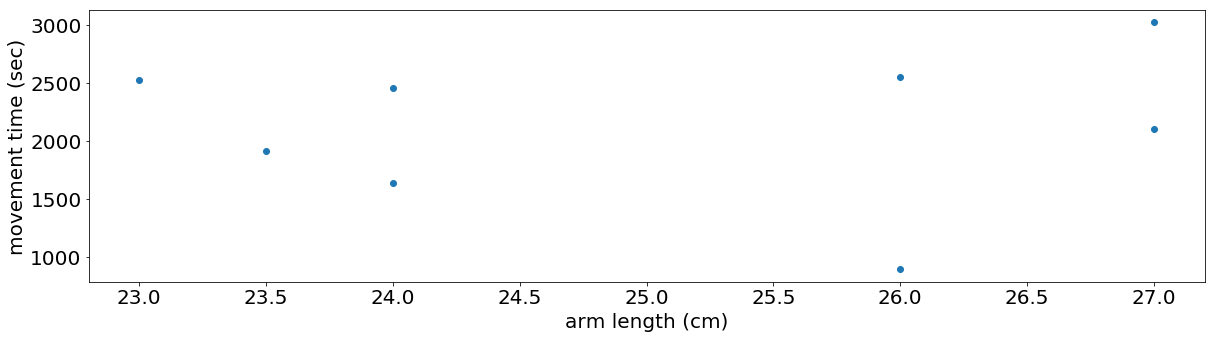

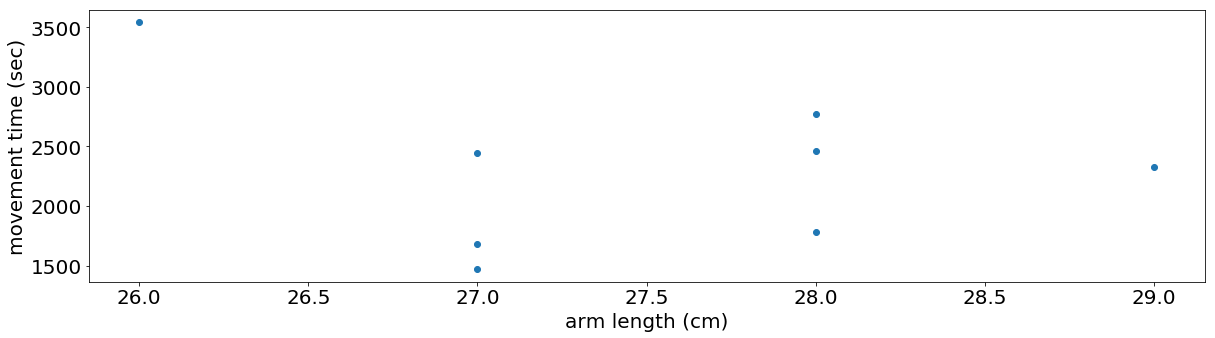

In [10]:
plt.plot(armLengthF, avgMvmTimeF, 'o')
plt.xlabel("arm length (cm)")
plt.ylabel("movement time (sec)")
plt.show()

plt.plot(armLengthM, avgMvmTimeM,  'o')
plt.xlabel("arm length (cm)")
plt.ylabel("movement time (sec)")
plt.show()

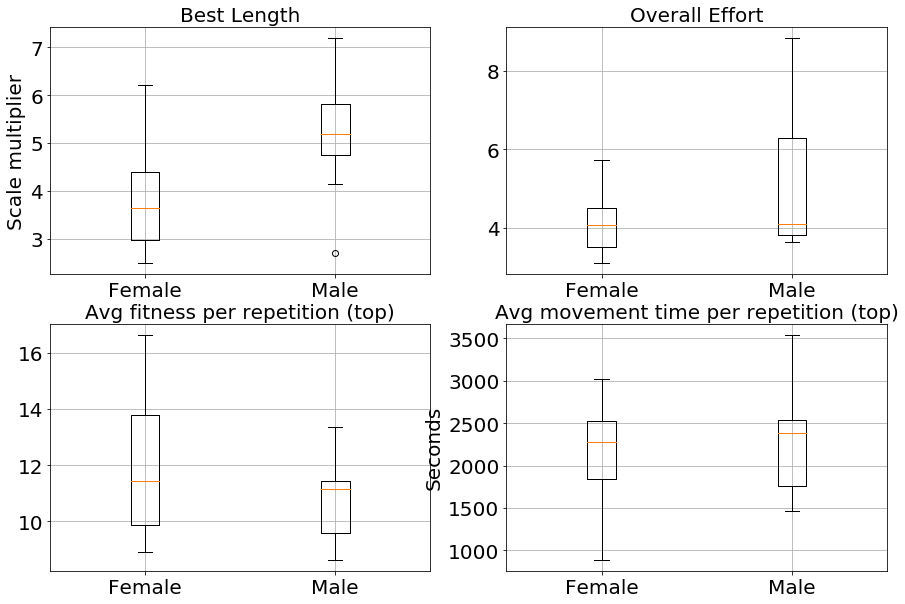

In [11]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15,10))


axs[0][0].boxplot([ multiplierF, multiplierM ], labels= [ "Female", "Male"])
axs[0][0].set_title("Best Length")
axs[0][0].set_ylabel("Scale multiplier")
axs[0][0].grid(True)

axs[0][1].boxplot([effortF[:,0], effortM[:,0]], labels= ["Female", "Male"], showfliers=False)
axs[0][1].set_title("Overall Effort")
axs[0][1].set_ylabel("")
axs[0][1].grid(True)

axs[1][0].boxplot([avgGainF, avgGainM], labels= ["Female", "Male"])
axs[1][0].set_title("Avg fitness per repetition (top)")
axs[1][0].set_ylabel("")
axs[1][0].grid(True)

axs[1][1].boxplot([avgMvmTimeF, avgMvmTimeM], labels= ["Female", "Male"])
axs[1][1].set_title("Avg movement time per repetition (top)")
axs[1][1].set_ylabel("Seconds")
axs[1][1].grid(True)

plt.savefig("BestLengthResults",bbox_inches='tight', dpi=150)

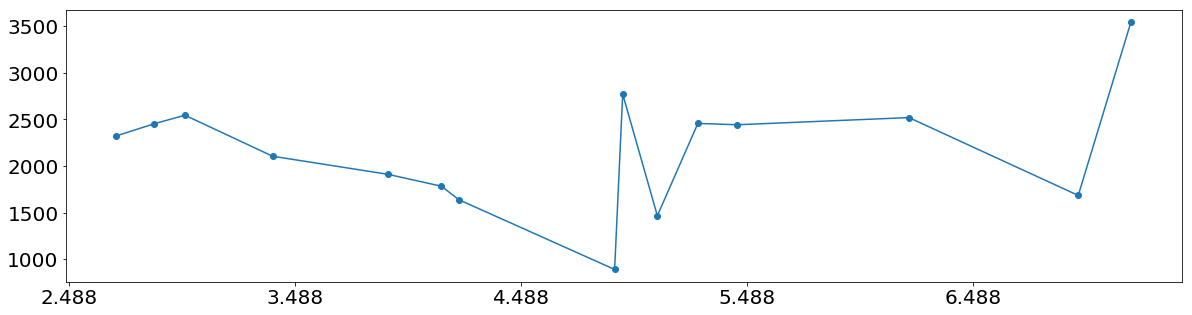

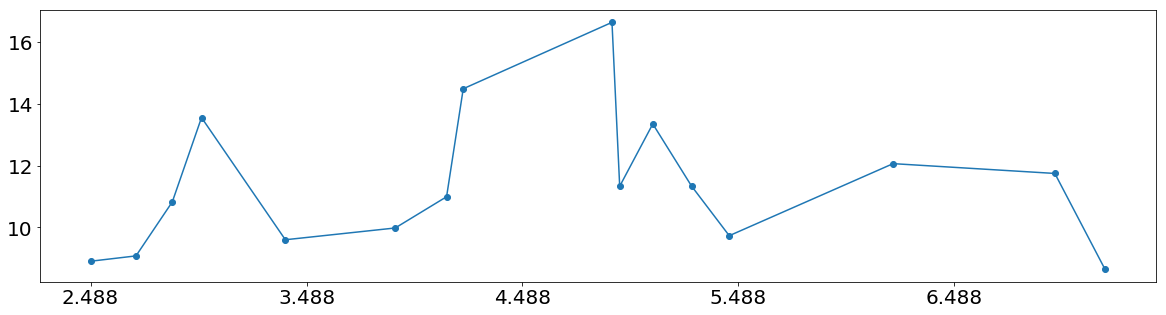

In [12]:
# combine plot for length and movement time

length2, gain2 = getCombinedPlot(l, avgGain)
length2, mvmTim2 = getCombinedPlot(l, avgMvmTime)

plt.xticks(np.arange(min(length2), max(length2)+1, 1.0))
plt.plot(length2[1:], mvmTim2[1:], 'o-')
plt.show()

plt.xticks(np.arange(min(length2), max(length2)+1, 1.0))
plt.plot(length2, gain2, 'o-')
plt.show()

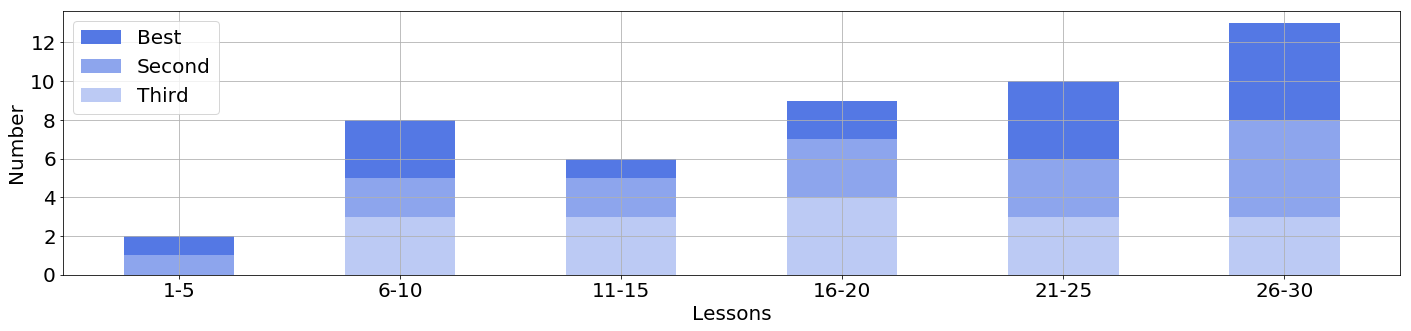

In [89]:
bestLessons = []

best = [0]*6
second = [0]*6
third = [0]*6

for p in players:
    fitness = getResultPerPlayer(p, results, idxGain, True)
    idc = np.argsort(fitness)
    tmp = idc[-3:]
    bestLessons.append(idc[-3:])
    best[math.floor(tmp[2]/5)] += 1
    second[math.floor(tmp[1]/5)] += 1
    third[math.floor(tmp[0]/5)] += 1

# # data to plot
n_groups = 6



#GRAPHS#
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.9

a  = np.add(np.array(second), np.array(third)).tolist()

rects1 = plt.bar(index, best, bar_width, bottom=a, alpha=opacity,color=blue,label='Best')
rects2 = plt.bar(index, second, bar_width,bottom=third, alpha=0.6, color=blue ,label='Second')
rects3 = plt.bar(index, third, bar_width, alpha = 0.35, color = blue, label='Third')
plt.xlabel('Lessons')
plt.ylabel('Number')
plt.xticks(index, ('1-5','6-10','11-15','16-20','21-25','26-30'))
plt.yticks(list(range(0,14,2)))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("BestFitnessDistribution",bbox_inches='tight', dpi=150)
plt.show()

Baseline
Regression: a=0.73 b=-0.02, ms error= 0.741


Optimal
Regression: a=0.27 b=1.07, ms error= 0.875




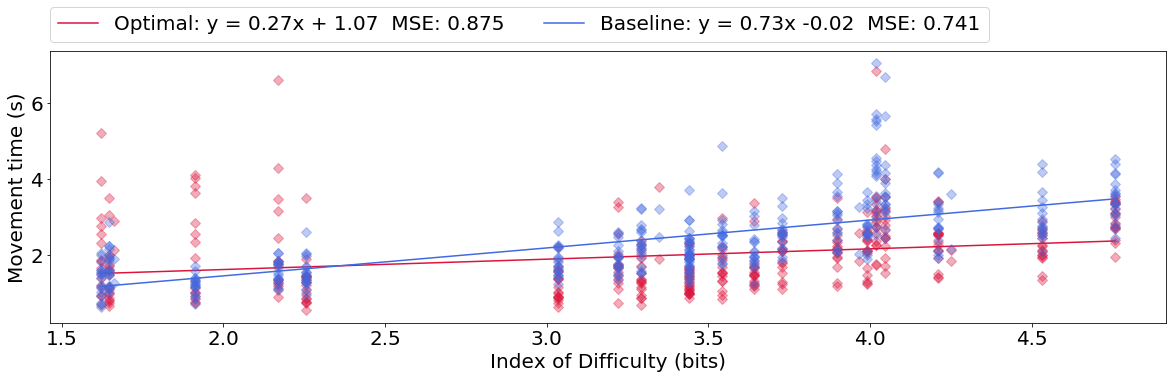

In [86]:
btmp, btmp2, baselineTimes, baselineIds = getResults(results, playersBaseline)
btmp2, btmp3, optimalTimes, optimalIds = getResults(results, playersOptimal)


baselineTimes = [item/1000 for sublist in baselineTimes for item in sublist]
baselineIds = [item for sublist in baselineIds for item in sublist]
optimalTimes = [item/1000 for sublist in optimalTimes for item in sublist]
optimalIds = [item for sublist in optimalIds for item in sublist]


idx   = np.argsort(baselineIds)
baselineIds = (np.array(baselineIds)[idx]).tolist()
baselineTimes = (np.array(baselineTimes)[idx]).tolist()

idx   = np.argsort(optimalIds)
optimalIds = (np.array(optimalIds)[idx]).tolist()
optimalTimes = (np.array(optimalTimes)[idx]).tolist()

(base_a, base_b) = polyfit(baselineIds, baselineTimes, 1)
baselineRegression = polyval([base_a, base_b], baselineIds)
base_err = sqrt(sum((baselineRegression - baselineTimes)**2)/len(baselineTimes))
print('Baseline\nRegression: a=%.2f b=%.2f, ms error= %.3f' % (base_a, base_b, base_err))
print('\n')

(ar, br) = polyfit(optimalIds, optimalTimes, 1)
optimalRegression = polyval([ar, br], optimalIds)
err = sqrt(sum((optimalRegression - optimalTimes)**2)/len(optimalTimes))
print('Optimal\nRegression: a=%.2f b=%.2f, ms error= %.3f' % (ar, br, err))
print('\n')

plt.plot(optimalIds, optimalTimes,  'D', alpha = 0.35, color = red, markersize=7)
plt.plot(optimalIds, optimalRegression, '-',color = red, label='Optimal: y = {:.2f}x + {:.2f}  MSE: {:.3f}'.format(ar,br,err))
plt.plot(baselineIds, baselineTimes,  'D', alpha = 0.35, color = blue, markersize=7)
plt.plot(baselineIds, baselineRegression,'-', color=blue, label='Baseline: y = {:.2f}x {:.2f}  MSE: {:.3f}'.format(base_a,base_b,base_err))
plt.xlabel("Index of Difficulty (bits)")
plt.ylabel("Movement time (s)")
plt.legend(loc='best', ncol=2,  bbox_to_anchor=(.85, 1.2))
# legend(['original','plus noise', 'regression'])
plt.savefig("MovementTimeID",bbox_inches='tight', dpi=150)
plt.show()


[1, 2, 3, 4]
